In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


Using TensorFlow backend.


Lod ResNet50 model.

https://github.com/KaimingHe/deep-residual-networks


In [2]:
model = ResNet50(weights='imagenet')

Display model summary
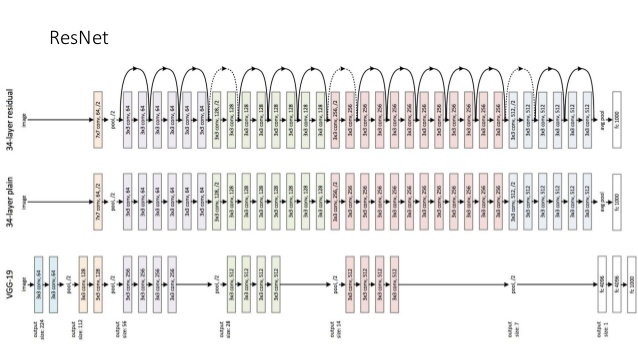

In [3]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

Now let's try to analyze a sample image of a skirt and see what the model thinks it is.
The image has to be resized to 224x224. We use build in Keras image handling and preprocessing which scales both image size and dynamic range so it matches the ResNet paper specification.

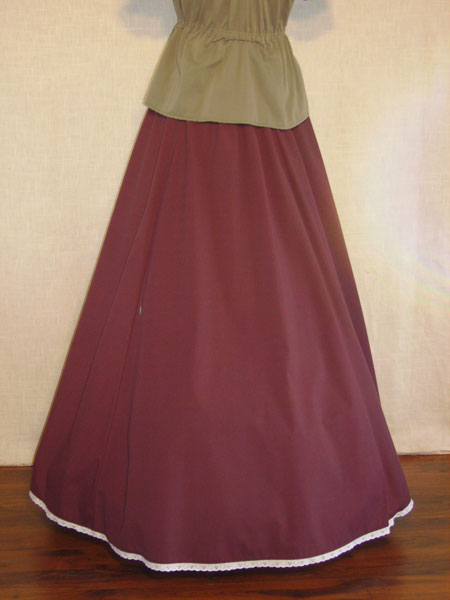

In [4]:
from IPython.display import Image
from matplotlib import pyplot as plt
img_path = "./data/2.jpg"
display(Image(filename=img_path, width=224, height=224))

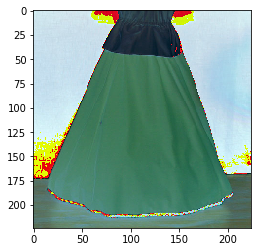

Predicted: [('n03534580', 'hoopskirt', 0.49993145), ('n03450230', 'gown', 0.25393176), ('n03866082', 'overskirt', 0.19110136)]


In [5]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)


plt.imshow(x[0])
plt.show()
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Let's build a function that reurns the list of prediction probablities. 

In [6]:
from urllib.request import urlretrieve
from IPython.display import Image
import os
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

def recognize_image_from_url(img_url, img_path=None, display_image=True, size=(224,224), top=5, model=model):
    if img_path is None:
        img_path = os.path.join("data",os.path.basename(img_url))
    urlretrieve(img_url, img_path)
    w,h = size
    if display_image:
        display(Image(filename=img_path, width=w, height=h))
        
    img = image.load_img(img_path, target_size=(w, h))
    x = image.img_to_array(img)
    
    if display_image:
        plt.imshow(x/255)
        plt.show()
    
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)


    preds = model.predict(x)
    decoded=decode_predictions(preds, top=top)[0]
    #rint('Predicted:', decoded)
    return decoded



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


This example shows how easy it is for model to fail. 

The Image Net bow tie class contains lot of images of men holding ties in their hands plus the shape of hands resemples bowtie and that was enough to fool the model.
http://image-net.org/explore.php?wnid=n02883205#

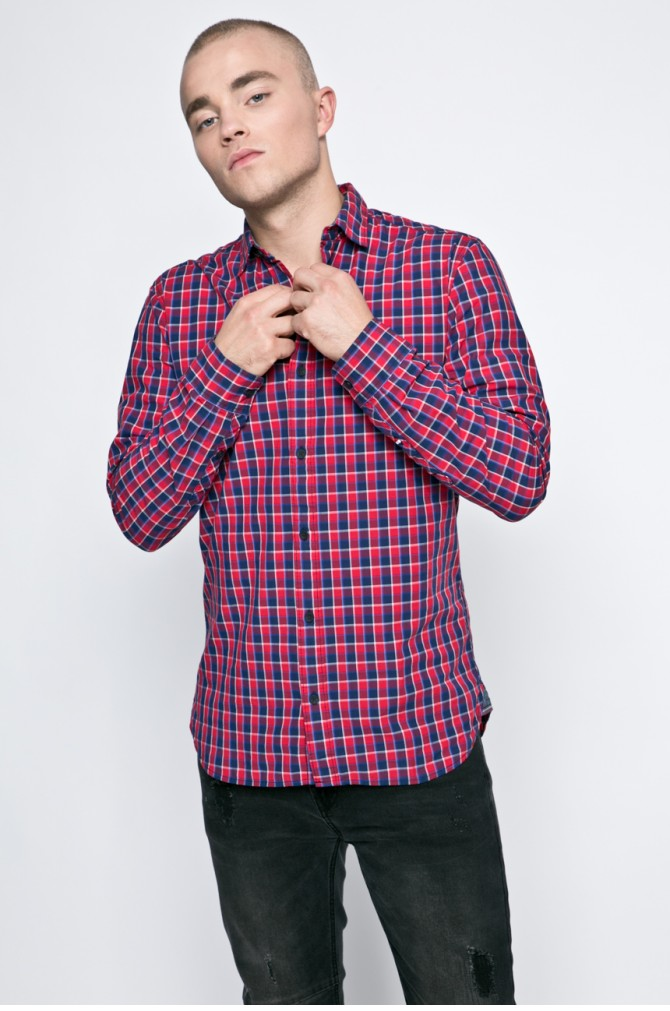

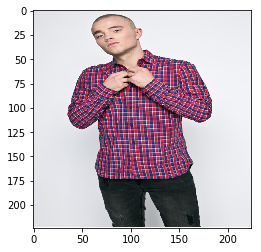

[('n02883205', 'bow_tie', 0.84754455),
 ('n03124170', 'cowboy_hat', 0.030420242),
 ('n04591157', 'Windsor_tie', 0.01745387),
 ('n04325704', 'stole', 0.01475437),
 ('n02834397', 'bib', 0.0079422751)]

In [7]:
recognize_image_from_url("https://img.ans-media.com/files/sc_staging_images/product/large_img_1156636.jpg")

Sometime the predictrion is very specific like in this case. We might use wornet to obtain hypernym.

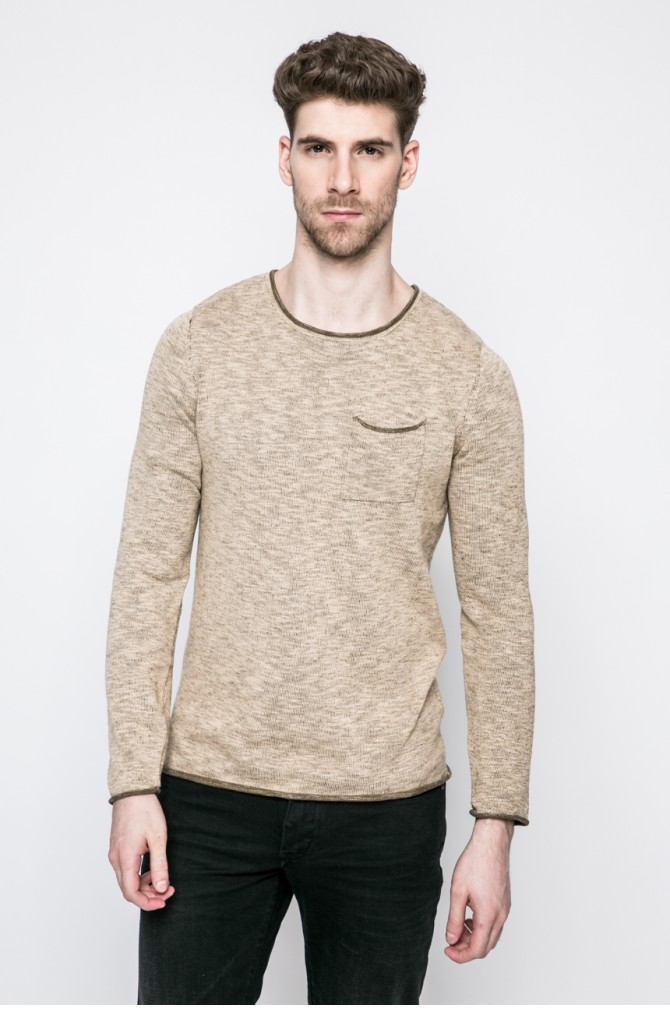

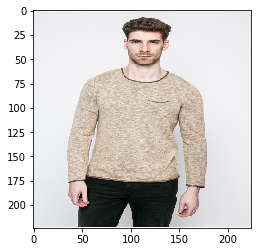

[('n02963159', 'cardigan', 0.8252908),
 ('n03594734', 'jean', 0.1170019),
 ('n04599235', 'wool', 0.019452229),
 ('n04370456', 'sweatshirt', 0.0069755218),
 ('n03770439', 'miniskirt', 0.0032639729)]

In [8]:
recognized=recognize_image_from_url("https://img.ans-media.com/files/sc_staging_images/product/large_img_1160755.jpg")
recognized

The NLTK package porovides all the tools for wordnet quering.

In [9]:
def get_wordnet_hypernym(word):
    w=wordnet.synsets(word)[0]
    return w.hypernyms()[0]

get_wordnet_hypernym(recognized[0][1])

Synset('sweater.n.01')

Let's try some more not obvious cloth images.

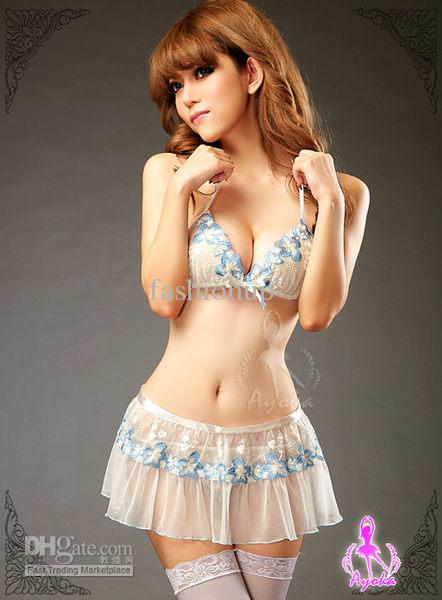

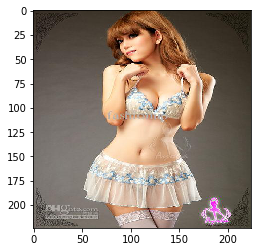

[('n02837789', 'bikini', 0.51820767),
 ('n02892767', 'brassiere', 0.13951108),
 ('n03710637', 'maillot', 0.099840708),
 ('n03770439', 'miniskirt', 0.055551231),
 ('n03450230', 'gown', 0.053365253)]

In [10]:
recognize_image_from_url("https://www.dhresource.com/albu_245793597_00-1.0x0/sexy-lace-lingerie-bra-g-string-skirts-lingerie.jpg")

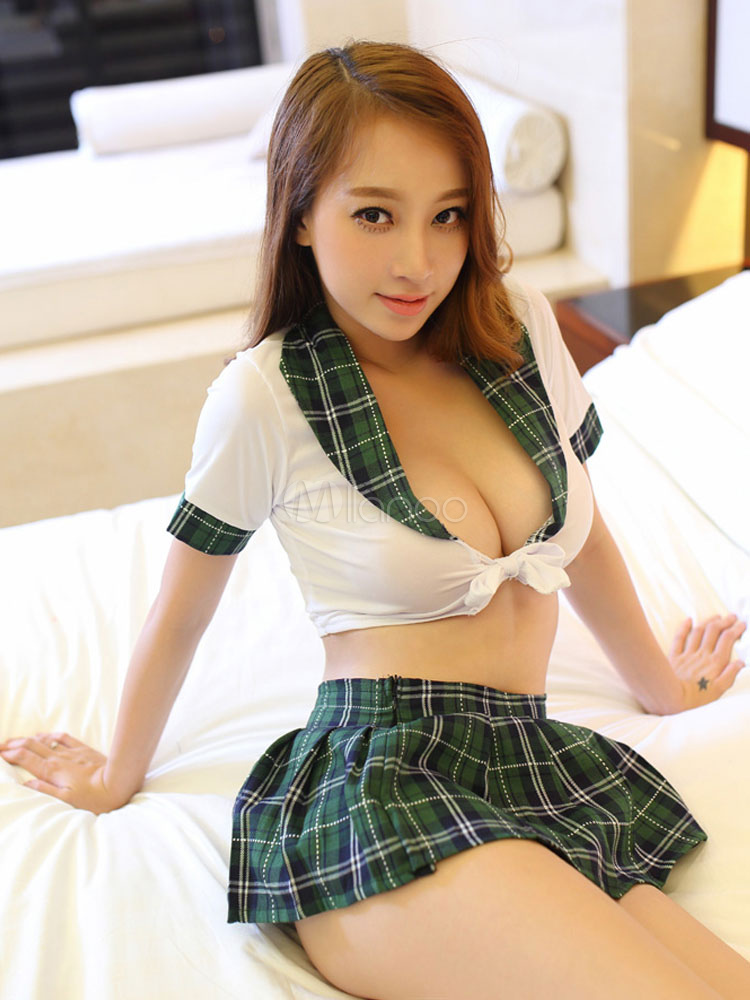

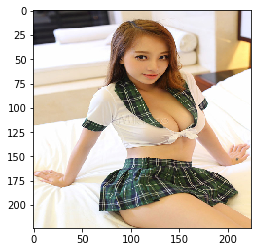

[('n03770439', 'miniskirt', 0.87537223),
 ('n02892767', 'brassiere', 0.041078005),
 ('n03710637', 'maillot', 0.019716606),
 ('n02837789', 'bikini', 0.014802797),
 ('n03594734', 'jean', 0.0095449062)]

In [11]:
recognize_image_from_url("https://www-s.mlo.me/upen/v/tb2016/tb201610/tb20161028/5e047626-bd4c-4aea-b394-571fb2b87f62.jpg")

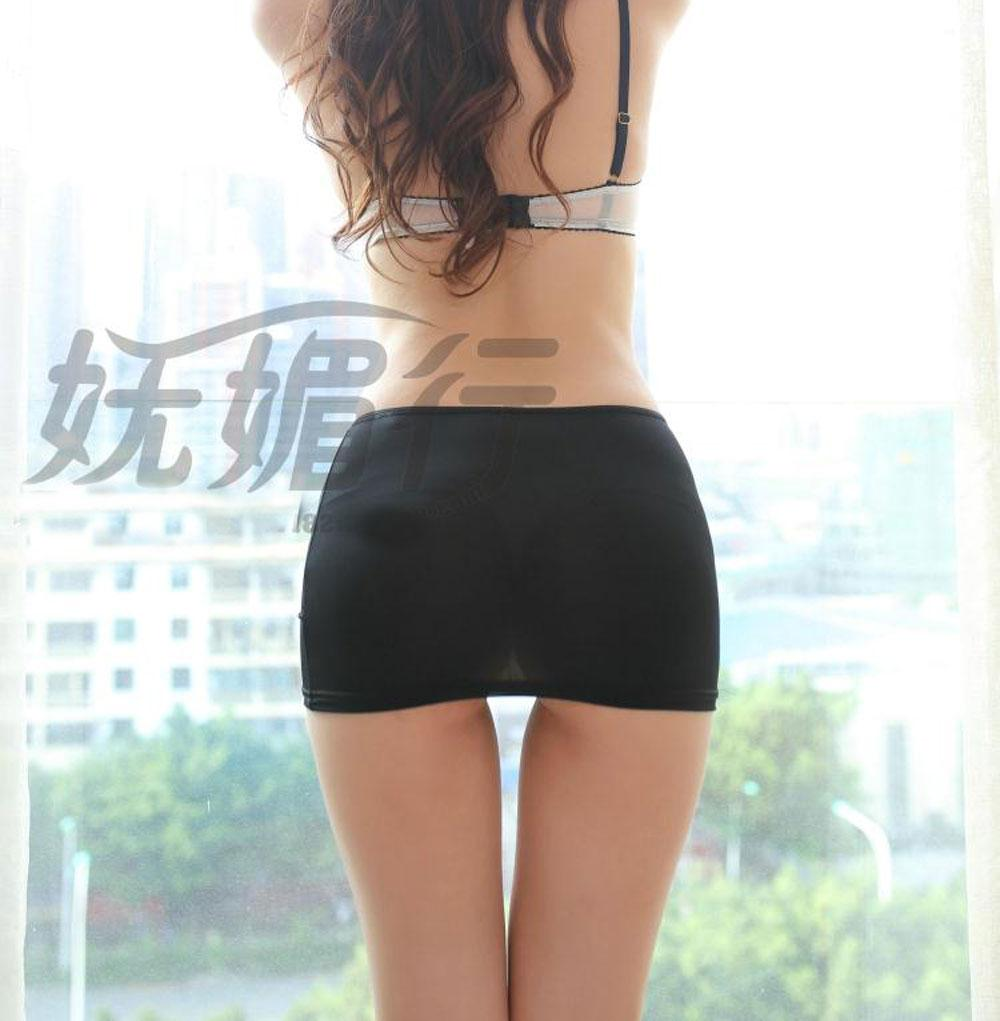

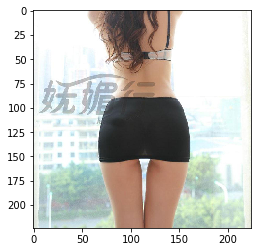

[('n03770439', 'miniskirt', 0.4847087),
 ('n02892767', 'brassiere', 0.35721675),
 ('n03710637', 'maillot', 0.083522707),
 ('n03710721', 'maillot', 0.02333281),
 ('n04590129', 'window_shade', 0.011616207)]

In [12]:
recognize_image_from_url("https://www.dhresource.com/0x0s/f2-albu-g4-M01-4B-C5-rBVaEVbv6VqAOc22AAF_FtyypbY020.jpg/hot-sexy-tight-pencil-cute-skirt-see-through.jpg")

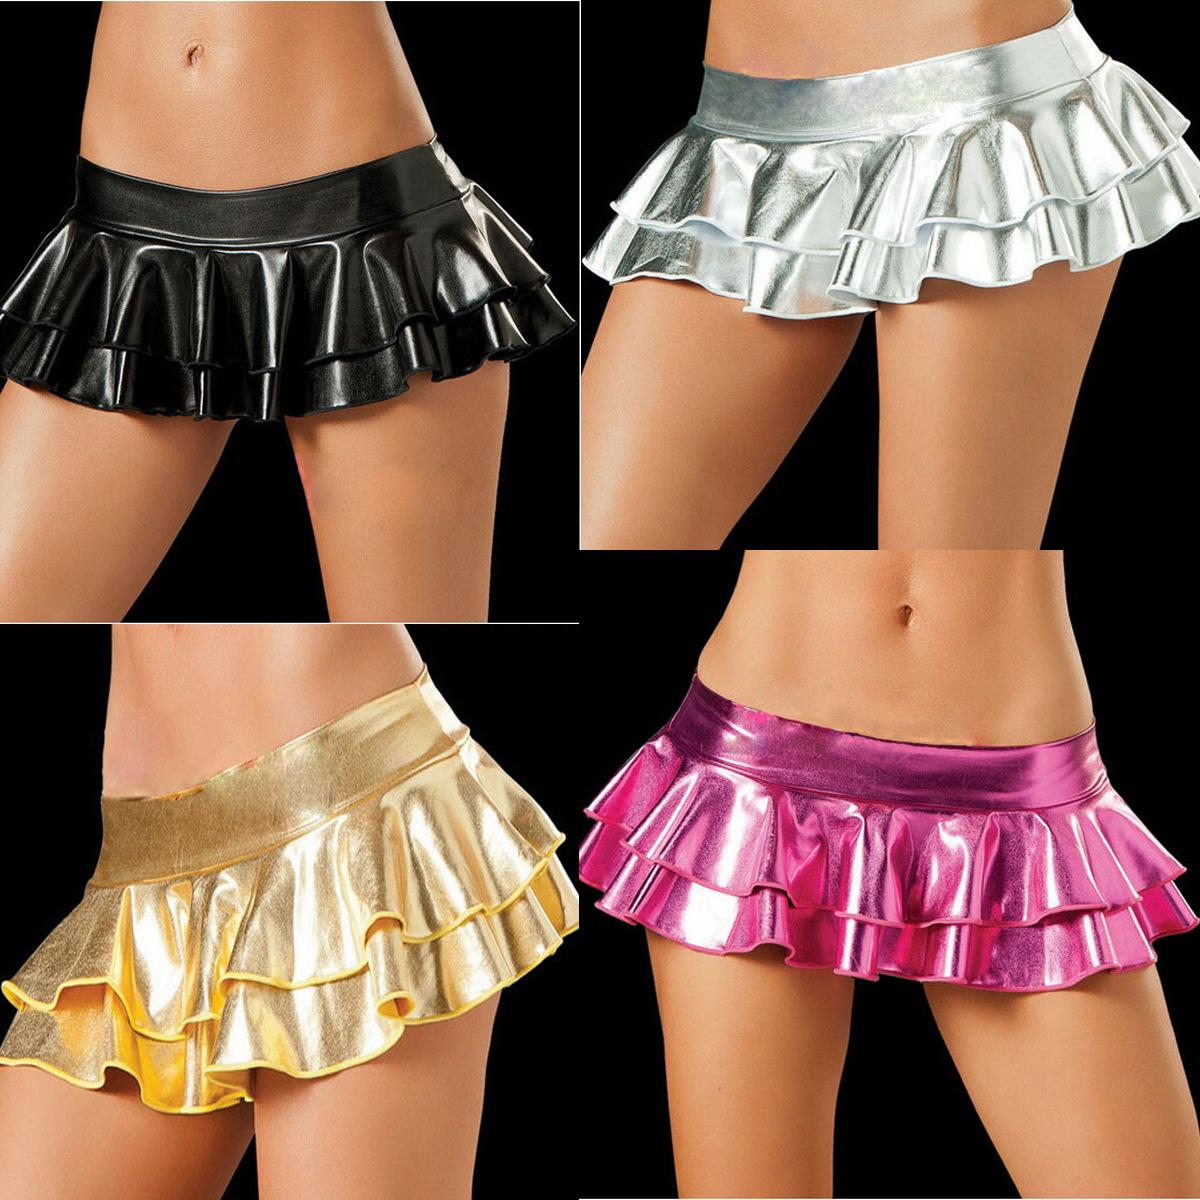

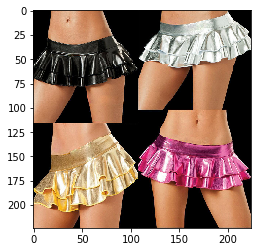

[('n03770439', 'miniskirt', 0.99999666),
 ('n02892767', 'brassiere', 2.0342052e-06),
 ('n03124043', 'cowboy_boot', 5.7414178e-07),
 ('n03534580', 'hoopskirt', 2.0503836e-07),
 ('n03710637', 'maillot', 1.9561091e-07)]

In [13]:
recognize_image_from_url("https://www.dhresource.com/0x0s/f2-albu-g4-M00-77-89-rBVaEVcUZxqAdyrJAAbY_hEKf_0898.jpg/candy-color-women-clothing-dance-skirts-stage.jpg")

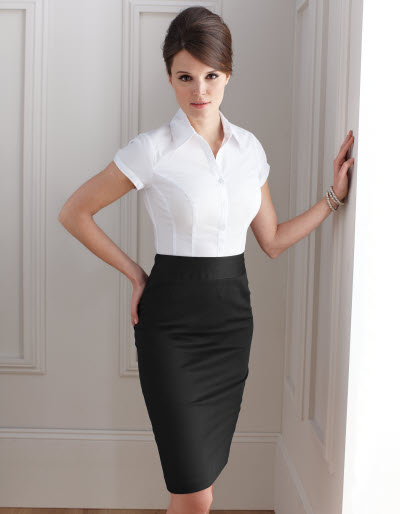

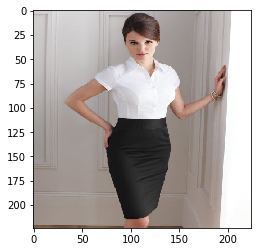

[('n03594734', 'jean', 0.56788766),
 ('n03770439', 'miniskirt', 0.25443035),
 ('n15075141', 'toilet_tissue', 0.02228184),
 ('n04254777', 'sock', 0.017841307),
 ('n03680355', 'Loafer', 0.015964881)]

In [14]:
recognize_image_from_url("https://s-media-cache-ak0.pinimg.com/originals/f7/b5/83/f7b583892d7c4ce1c2b799a442134e1e.jpg")

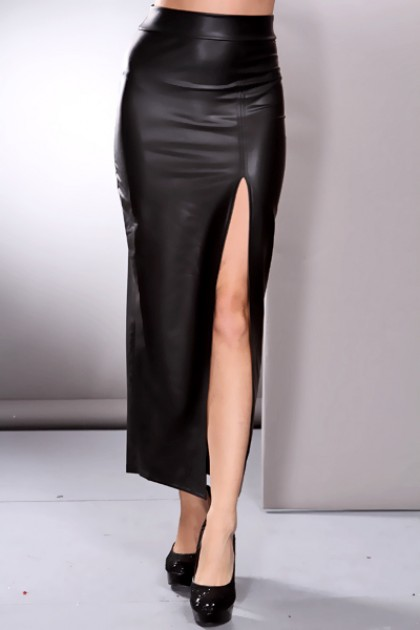

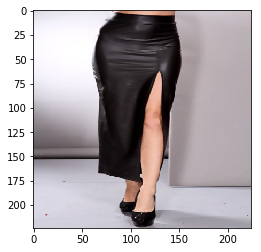

[('n03450230', 'gown', 0.49388704),
 ('n03770439', 'miniskirt', 0.13244881),
 ('n03594734', 'jean', 0.10527793),
 ('n04350905', 'suit', 0.077999465),
 ('n03710637', 'maillot', 0.049857136)]

In [15]:
recognize_image_from_url("http://picture-cdn.wheretoget.it/f5d1a8-i.jpg")

https://en.wikipedia.org/wiki/Gown

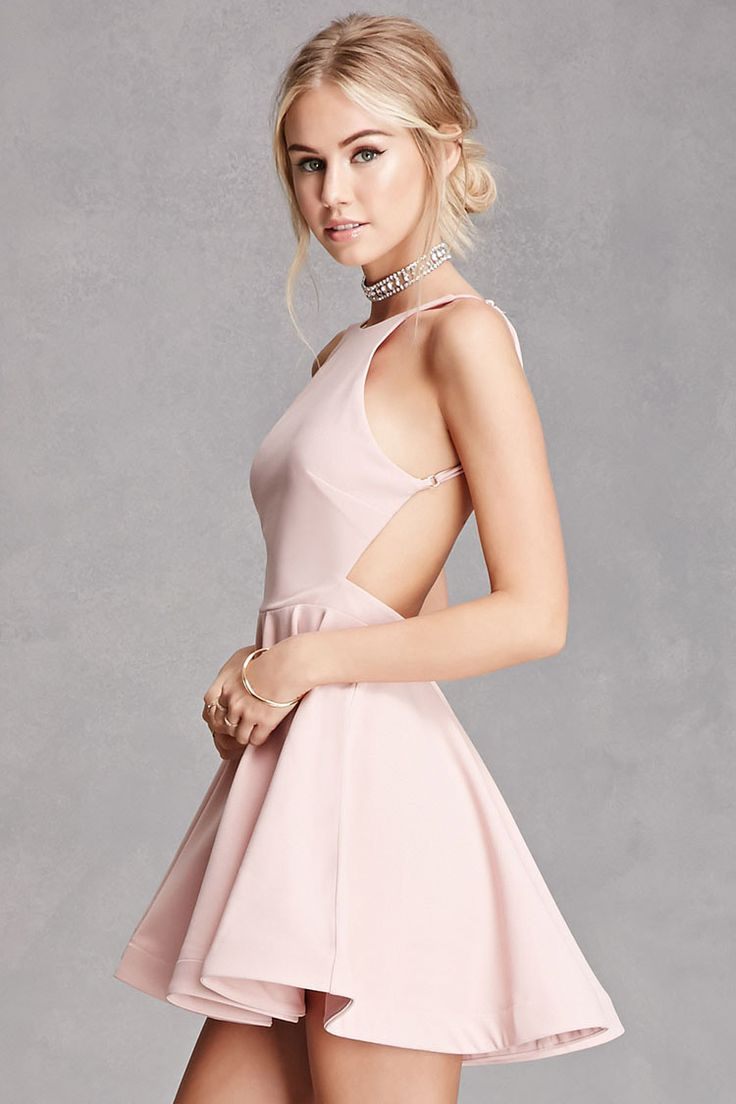

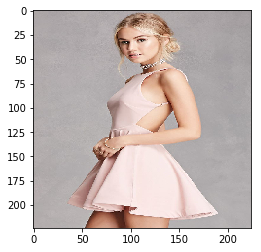

[('n03450230', 'gown', 0.31374103),
 ('n03770439', 'miniskirt', 0.31266961),
 ('n03534580', 'hoopskirt', 0.15849541),
 ('n03866082', 'overskirt', 0.062871598),
 ('n02837789', 'bikini', 0.038918797)]

In [16]:
recognize_image_from_url("https://i.pinimg.com/736x/c9/ab/00/c9ab00ea1b0f83f99bb672feb8da975c--circle-skirt-dress-full-circle-skirts.jpg")

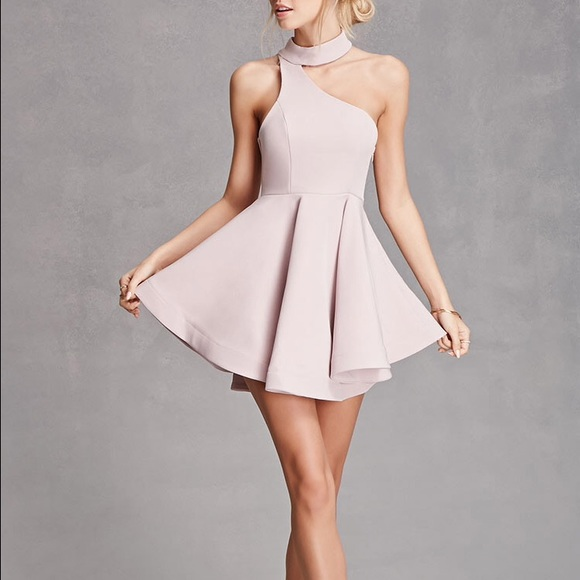

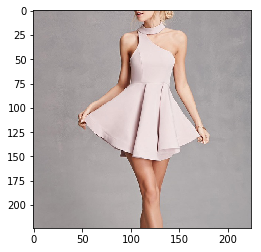

[('n03770439', 'miniskirt', 0.67366457),
 ('n03450230', 'gown', 0.14497901),
 ('n03534580', 'hoopskirt', 0.058729913),
 ('n03866082', 'overskirt', 0.051255874),
 ('n03710637', 'maillot', 0.012810584)]

In [17]:
recognize_image_from_url(
    "https://dtpmhvbsmffsz.cloudfront.net/posts/2016/12/09/584b44025a49d0e10800e117/m_584b44025a49d0e10800e118.jpg")

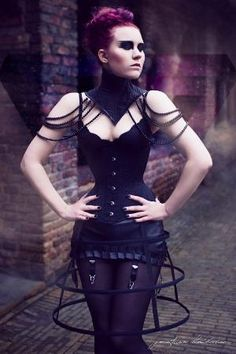

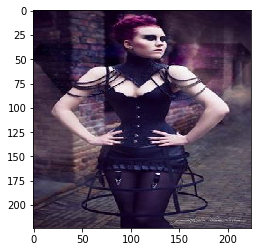

[('n03534580', 'hoopskirt', 0.32883665),
 ('n04356056', 'sunglasses', 0.068906084),
 ('n03759954', 'microphone', 0.063420258),
 ('n02807133', 'bathing_cap', 0.050933473),
 ('n03866082', 'overskirt', 0.039988931)]

In [18]:
recognize_image_from_url(
    "https://i.pinimg.com/236x/5a/66/9b/5a669b3dfa46799c95bbb0dfe18ad5b4--cage-skirt-hoop-skirt.jpg")

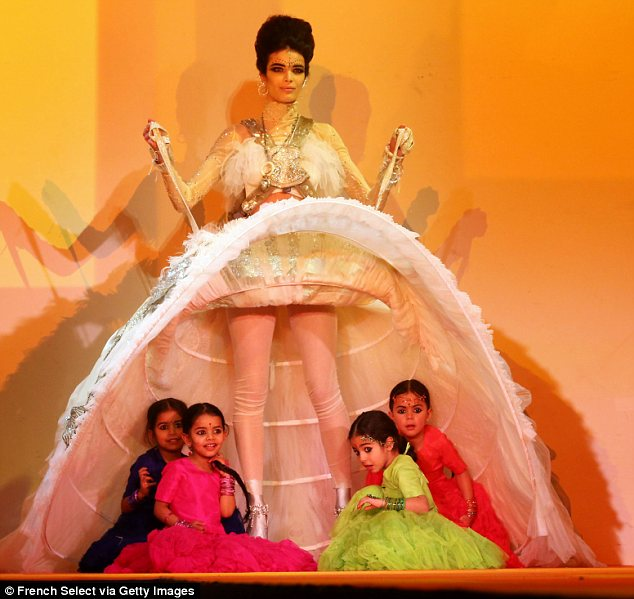

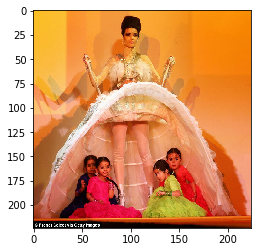

[('n10148035', 'groom', 0.61023891),
 ('n03388043', 'fountain', 0.30291581),
 ('n09229709', 'bubble', 0.044044722),
 ('n02699494', 'altar', 0.024839984),
 ('n04532106', 'vestment', 0.0051704282)]

In [19]:
recognized=recognize_image_from_url(
    "https://s-media-cache-ak0.pinimg.com/originals/a8/8b/f7/a88bf76045a390900307095631a12f30.jpg")
recognized

In [20]:
wordnet.synsets(recognized[0][1])

[Synset('groom.n.01'),
 Synset('stableman.n.01'),
 Synset('groom.n.03'),
 Synset('prepare.v.05'),
 Synset('dress.v.15'),
 Synset('groom.v.03')]

In [21]:
wordnet.synsets(recognized[0][1])[4]

Synset('dress.v.15')

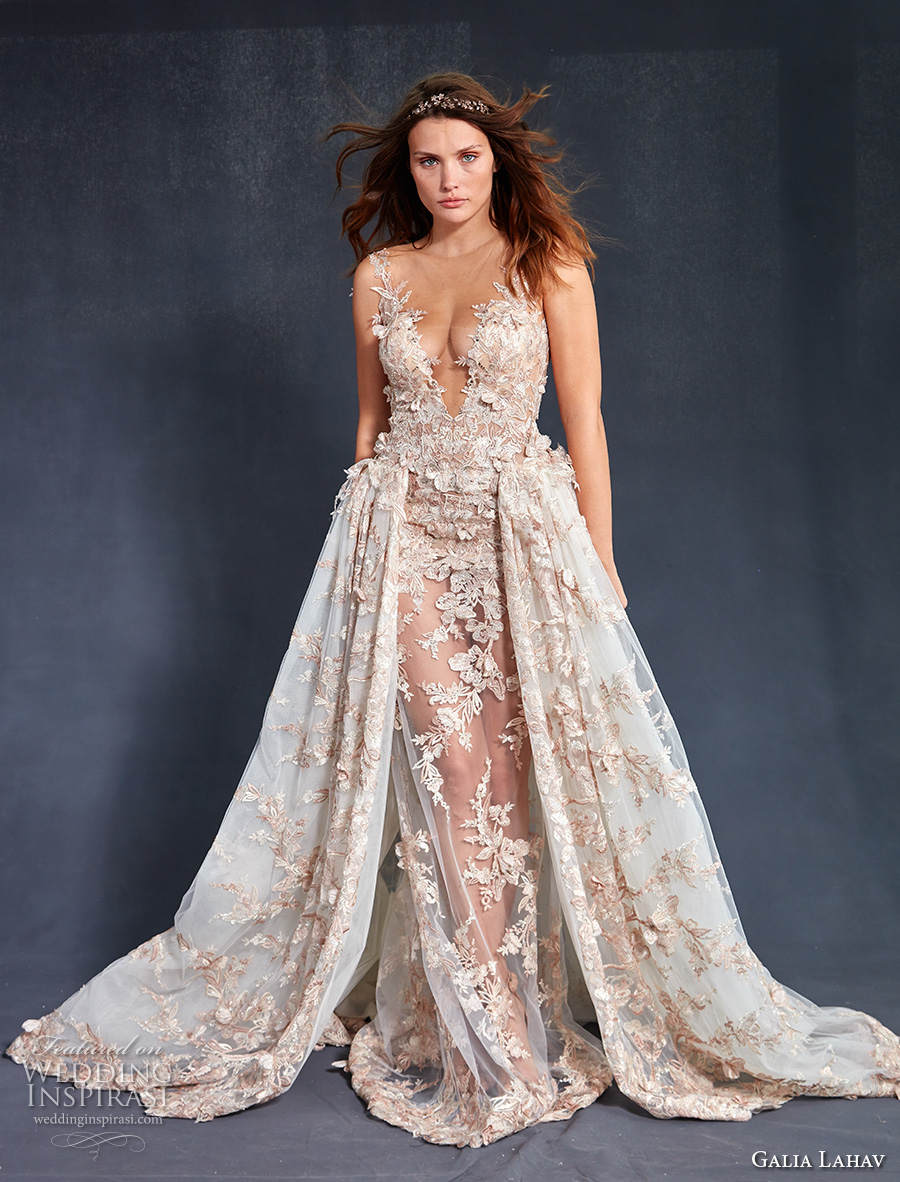

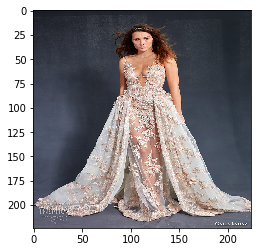

[('n03450230', 'gown', 0.763964),
 ('n03866082', 'overskirt', 0.20853908),
 ('n03534580', 'hoopskirt', 0.0160884),
 ('n03045698', 'cloak', 0.0042638029),
 ('n04136333', 'sarong', 0.0012597216)]

In [22]:
recognize_image_from_url("https://s-media-cache-ak0.pinimg.com/originals/07/cb/4e/07cb4e171ef9355227858217a23ccb76.jpg")

In [23]:
get_wordnet_hypernym("gown")

Synset('dress.n.01')